In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
# Classification and Regression Trees (CART)
from sklearn.tree import DecisionTreeClassifier
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Gaussian Naive Bayes (NB)
from sklearn.naive_bayes import GaussianNB
# Support Vector Machines (SVM)
from sklearn.svm import SVC

## Data Analysis

In [152]:
df = pd.read_csv('freedom.csv')
df.head()

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,Afghanistan,1995,7,7,NF,142,Asia,1
1,Afghanistan,1996,7,7,NF,142,Asia,1
2,Afghanistan,1997,7,7,NF,142,Asia,1
3,Afghanistan,1998,7,7,NF,142,Asia,1
4,Afghanistan,1999,7,7,NF,142,Asia,1


In [153]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      4979 non-null   object
 1   year         4979 non-null   int64 
 2   CL           4979 non-null   int64 
 3   PR           4979 non-null   int64 
 4   Status       4979 non-null   object
 5   Region_Code  4979 non-null   int64 
 6   Region_Name  4979 non-null   object
 7   is_ldc       4979 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 311.3+ KB


None

,year,CL,PR,Region_Code,is_ldc
count,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000
mean,2007.555935,3.368548,3.410524,72.534244,0.236192
std,7.494463,1.868127,2.182737,68.642348,0.424784
min,1995.000000,1.000000,1.000000,2.000000,0.000000
25%,2001.000000,2.000000,1.000000,2.000000,0.000000
50%,2008.000000,3.000000,3.000000,19.000000,0.000000
75%,2014.000000,5.000000,6.000000,142.000000,0.000000
max,2020.000000,7.000000,7.000000,150.000000,1.000000


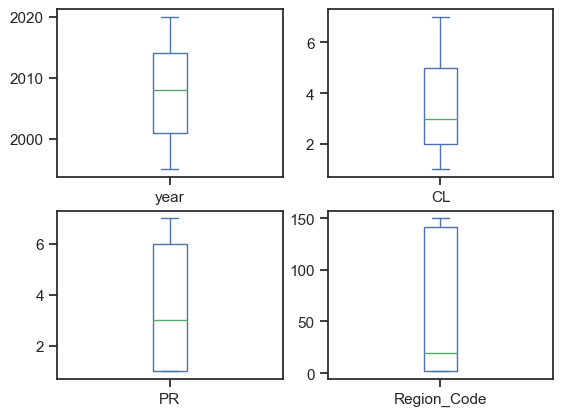

In [154]:
# box and whisker plots
df.iloc[:, [1,2,3,5]].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [155]:
# Compare unique values of "Region_Name" and "Region_Code"
display(df['country'].value_counts())
display(df['Region_Name'].value_counts())
display(df['Region_Code'].value_counts())
display(df['Status'].value_counts())

country
Afghanistan    26
Panama         26
Nicaragua      26
Niger          26
Nigeria        26
               ..
Zimbabwe       26
Timor-Leste    22
Serbia         18
Montenegro     15
South Sudan    10
Name: count, Length: 193, dtype: int64

Region_Name
Africa      1388
Asia        1218
Europe      1099
Americas     910
Oceania      364
Name: count, dtype: int64

Region_Code
2      1388
142    1218
150    1099
19      910
9       364
Name: count, dtype: int64

Status
F     2219
PF    1503
NF    1257
Name: count, dtype: int64

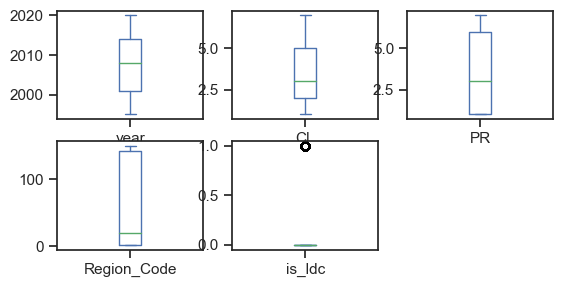

In [156]:
# box and whisker plots
df.iloc[:, [1,2,3,4,5,7]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

array([[<Axes: title={'center': 'year'}>, <Axes: title={'center': 'CL'}>],
       [<Axes: title={'center': 'PR'}>,
        <Axes: title={'center': 'Region_Code'}>],
       [<Axes: title={'center': 'is_ldc'}>, <Axes: >]], dtype=object)

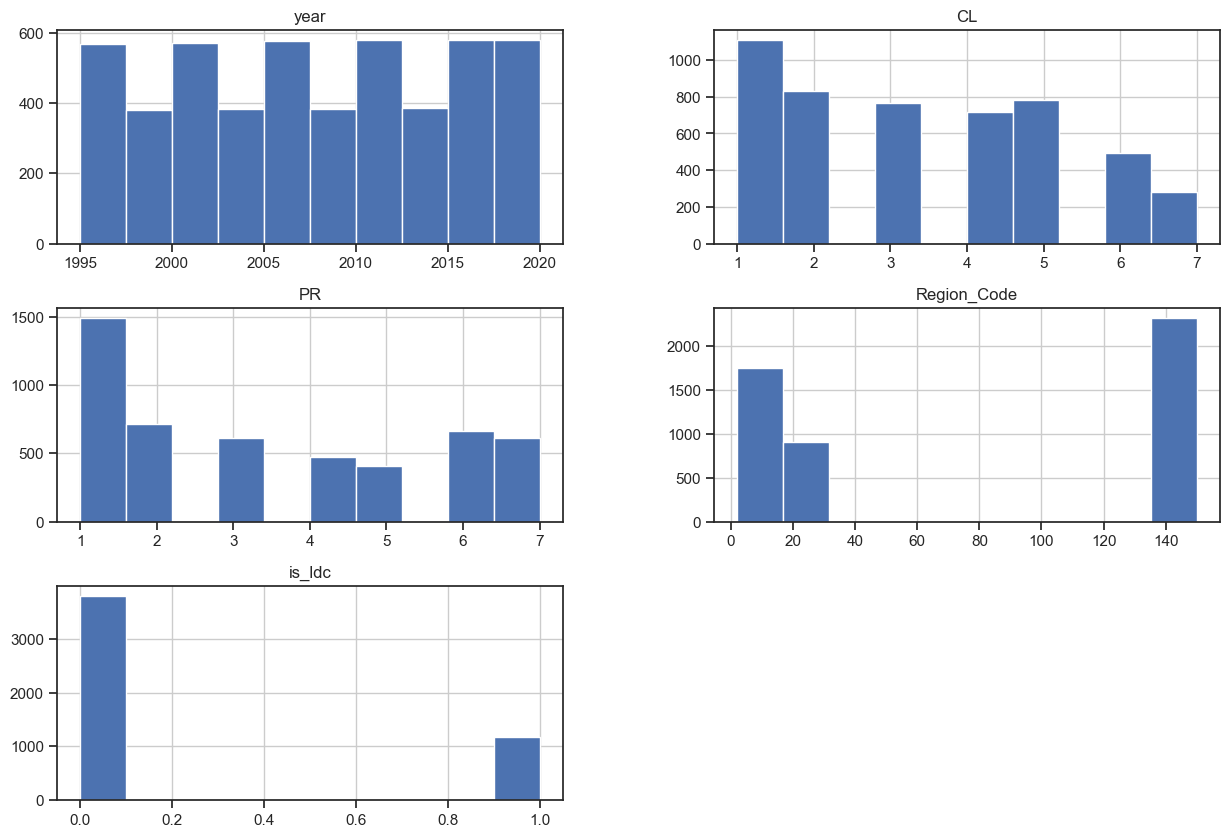

In [157]:
df.iloc[:, [1,2,3,4,5,7]].hist(figsize=(15,10))

/Users/tnurmanov/anaconda3/envs/env_full/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


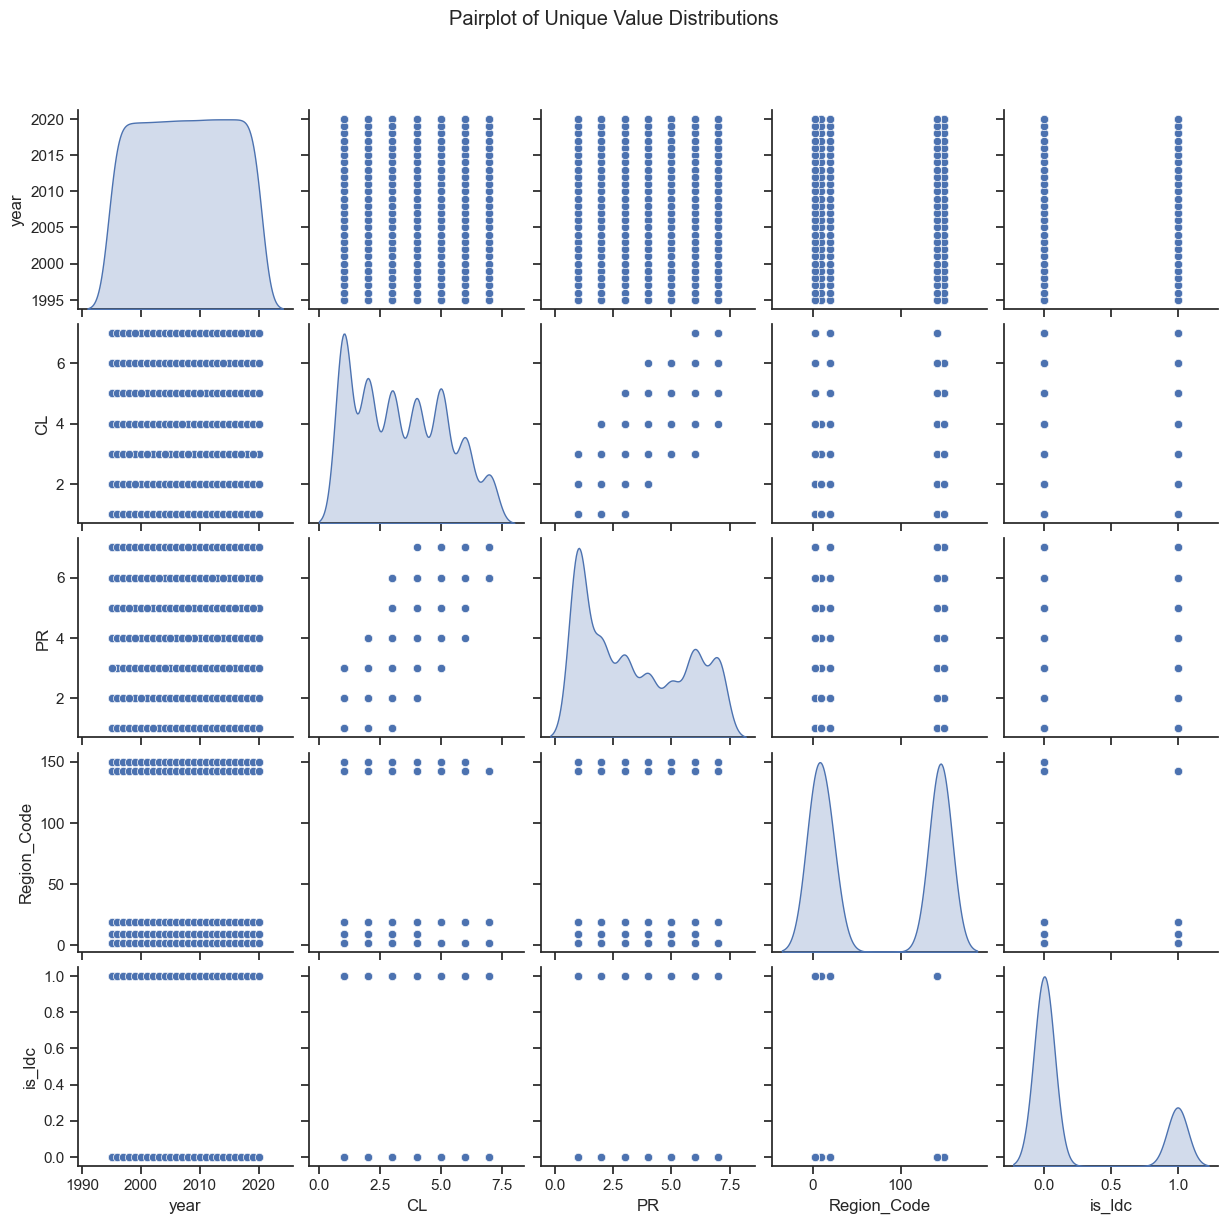

In [158]:
sns.set(style="ticks")
sns.pairplot(df.iloc[:, [1,2,3,4,5,7]], markers="o", diag_kind="kde")

# Adjust the plot layout
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot of Unique Value Distributions")

# Show the plot
plt.show()

## Split the dataset

I chose **Status** clumn as target variable

In [159]:
df1 = df.copy()

Since **Region_Name** and **Country** columns contain string values. 
I decided to perform one-hot-encoding in order to create more features for my model.

In [160]:
df1 = pd.get_dummies(df, columns=['country'], prefix=['category'])
df1 = pd.get_dummies(df1, columns=['Region_Name'], prefix=['category'])
df1

,year,CL,PR,Status,Region_Code,is_ldc,category_Afghanistan,category_Albania,category_Algeria,category_Andorra,...,category_Venezuela (Bolivarian Republic of),category_Viet Nam,category_Yemen,category_Zambia,category_Zimbabwe,category_Africa,category_Americas,category_Asia,category_Europe,category_Oceania
0,1995,7,7,NF,142,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1996,7,7,NF,142,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1997,7,7,NF,142,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1998,7,7,NF,142,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1999,7,7,NF,142,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,2016,5,5,PF,2,0,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4975,2017,5,6,NF,2,0,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4976,2018,5,5,PF,2,0,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4977,2019,5,5,PF,2,0,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [161]:
# Split-out validation dataset
X = df1.iloc[:, list(range(3)) + list(range(4, len(df.columns)))]
y = df1['Status']

## Building a model

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

I considered one between 6 models:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN)
- Classification and Regression Trees (CART)
- Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)


In [163]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

In [164]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.990946 (0.005263)
LDA: 0.972848 (0.005502)
KNN: 0.977125 (0.009493)
CART: 0.993184 (0.004264)
NB: 0.888721 (0.021486)
SVM: 0.985266 (0.005636)


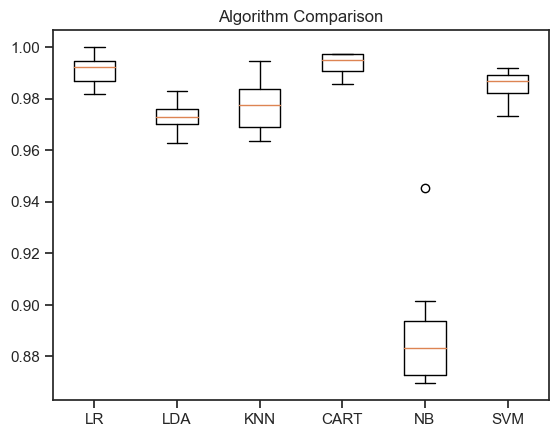

In [165]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

According to evaluation results, Classification and Regression Trees (CART) has the greatest accuracy.

In [166]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9016064257028112
[[450   0   1]
 [  0 268   0]
 [ 41  56 180]]
              precision    recall  f1-score   support

           F       0.92      1.00      0.96       451
          NF       0.83      1.00      0.91       268
          PF       0.99      0.65      0.79       277

    accuracy                           0.90       996
   macro avg       0.91      0.88      0.88       996
weighted avg       0.91      0.90      0.89       996



Prediction accuracy is 90.1% 